# Series de Tiempo -- R -- Suavizado Exponencial
Notas de clase sobre pronóstico de series de tiempo usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre la extracción, transformación, visualización y carga de datos usando **R** en el contexto de la ciencia de los datos. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

#### Contenido

> 
* [Suavizado exponencial simple](#Suavizado-exponencial-simple)
    * [Suavizado exponencial en R](#Suavizado-exponencial-en-R)
    * [Pronostico usando suavizado exponencial simple](#Pronostico-usando-suavizado-exponencial-simple)
* [Suavizado exponencial doble Método de Brown](#Suavizado-exponencial-doble-Método-de-Brown)
    * [Ajuste suavizado exponencial doble](#Ajuste-suavizado-exponencial-doble)
    * [Pronóstico suavizado exponencial doble](#Pronóstico-suavizado-exponencial-doble)
* [Suavizado exponencial triple](#Suavizado-exponencial-triple)
    * [Suavizado exponencial triple serie de tiempo de componentes aditiva](#Suavizado-exponencial-triple-serie-de-tiempo-de-componentes-aditiva)
    * [Pronóstico suavizado exponencial triple serie de tiempo de componentes aditiva](#Pronóstico-suavizado-exponencial-triple-serie-de-tiempo-de-componentes-aditiva)
    * [Suavizado exponencial triple serie de tiempo de componentes multiplicativas](#Suavizado-exponencial-triple-serie-de-tiempo-de-componentes-multiplicativas)
    * [Pronóstico suavizado exponencial triple serie de tiempo de componentes multiplicativas](#Pronóstico-suavizado-exponencial-triple-serie-de-tiempo-de-componentes-multiplicativas)

**Bibliografía**.

> [Bibliografia aquí](Vinculo aquí)

---

In [1]:
# Instale y cargue la librería
library(forecast)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



# Suavizado exponencial simple

[Contenido](#Contenido)

El modelo de suavizado exponencial simple se basa en el supuesto de que se tiene el valor real de la serie para el periodo $t$, $y_t$, y el pronóstico para ese mismo periodo $S_t$. En este caso, el pronóstico $S_{t+1}$ se calcula como el pronóstico para el periodo actual $S_t$ más un término de corrección del error cometido:

$$S_{t+1} = S_t + \alpha (y_t - S_{t}) $$

Donde:

* $S_{t+1}$ -- Es el  valor pronosticado para el siguiente periodo
* $S_t$ --  Es el valor estimado o pronósticado para el periodo actual. 
* $y_t$ -- Es el dato actual en el periodo de tiempo. 
* $(y_t - S_{t})$ -- La  estimación de error en el pronóstico del valor para el periodo actual.
* $\alpha$ -- Es el factor de correción del error.

Reorganizando terminos, la ecuación anterior se puede escribir como:

$$ S_{t+1} =  \alpha ~y_t + (1 - \alpha) S_t$$ 

o, en terminos genéricos:

Pronóstico siguiente periodo = (Peso) $\times$ (Observación del periodo actual) + (1 - peso) $\times$ (Pronóstico periodo actual).

La ecuación anterior permite usar recursión ya que: 

$$S_t = \alpha ~y_{t-1} + (1 - \alpha)S_{t-1}$$

---

**Ejercicio.--** Demuestre que:

$$S_{t+1} = \alpha y_t + \alpha(1- \alpha)y_{t-1} + \alpha(1- \alpha)^2 y_{t-2} + \alpha(1- \alpha)^3 y_{t-3}+ ... + \alpha(1- \alpha)^{t-1}y_{1}+(1- \alpha)^t S_{0}$$

---

## Suavizado exponencial en R

[Contenido](#Contenido)

> [`HoltWinters {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/HoltWinters.html)

La función HoltWinters implementa el método de suavizado exponencial. Para el ejemplo se usará la siguiente serie:

In [2]:
x <- ts(data  = c(1.67,  2.77,  4.14,  3.65,  # 2010
                  3.08,  3.43,  3.30,  1.62,  # 2011
                  0.34,  0.31,  1.50,  1.95,  # 2012
                  1.53,  1.72,  0.07, -1.37,  # 2013  
                  0.09,  0.74,  0.39,  2.26,  # 2014
                  2.75,  2.24,  2.22, -0.15), # 2015
        freq  = 4,
        start = c(2010,1))

In [3]:
n <- length(x) # longitud de la serie
m <- 4         # número de periodos a a pronósticar.

x.fit <- window(x, start = c(2010, 1), end = c(2014, 4))
x.for <- window(x, start = c(2015, 1), end = c(2015, 4))
x.fit
x.for

      Qtr1  Qtr2  Qtr3  Qtr4
2010  1.67  2.77  4.14  3.65
2011  3.08  3.43  3.30  1.62
2012  0.34  0.31  1.50  1.95
2013  1.53  1.72  0.07 -1.37
2014  0.09  0.74  0.39  2.26

      Qtr1  Qtr2  Qtr3  Qtr4
2015  2.75  2.24  2.22 -0.15

In [4]:
## se ajustan modelos para distintos valores de alpha
m1 <- HoltWinters(x = x.fit,     # Periodo de ajuste de la serie                                              
                  alpha = 0.3,   # parámetro 
                  beta = FALSE,  # parámetro - FALSE no se considera esta componente
                  gamma = FALSE) # parámetro - FALSE no se considera esta componente

m2 <- HoltWinters(x = x.fit,     # Periodo de ajuste de la serie                                              
                  alpha = 0.5,   # parámetro 
                  beta = FALSE,  # parámetro - FALSE no se considera esta componente
                  gamma = FALSE) # parámetro - FALSE no se considera esta componente


m3 <- HoltWinters(x = x.fit,     # Periodo de ajuste de la serie                                              
                  alpha = 0.9,   # parámetro 
                  beta = FALSE,  # parámetro - FALSE no se considera esta componente
                  gamma = FALSE) # parámetro - FALSE no se considera esta componente

In [5]:
m1

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = x.fit, alpha = 0.3, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.3
 beta : FALSE
 gamma: FALSE

Coefficients:
       [,1]
a 0.9752936

In [6]:
m2

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = x.fit, alpha = 0.5, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.5
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 1.309431

In [7]:
m3

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = x.fit, alpha = 0.9, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9
 beta : FALSE
 gamma: FALSE

Coefficients:
     [,1]
a 2.07572

La sumatoria del error cuadrático medio se calcula como:
$$\text{SSE} = \sum (S_t - y _t) ^2$$

In [8]:
## SSE para cada modelo
m1$SSE
m2$SSE
m3$SSE

[1] 30.68934

[1] 26.72644

[1] 21.82576

El resultado anterior muestra que con $\alpha$ = 0.9 se obtiene el SSE más bajo. Sin embargo, es posible calcular el valor óptimo de $\alpha$ como aquel valor que minimiza el SSE. 

In [9]:
m4 <- HoltWinters(x = x.fit,      # serie
                  alpha = NULL,   # NULL indica que se calcule el alpha óptimo
                  beta = FALSE,   # no se considera esta componente
                  gamma = FALSE)  # no se considera esta componente

In [10]:
m4

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = x.fit, alpha = NULL, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9999339
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 2.259876

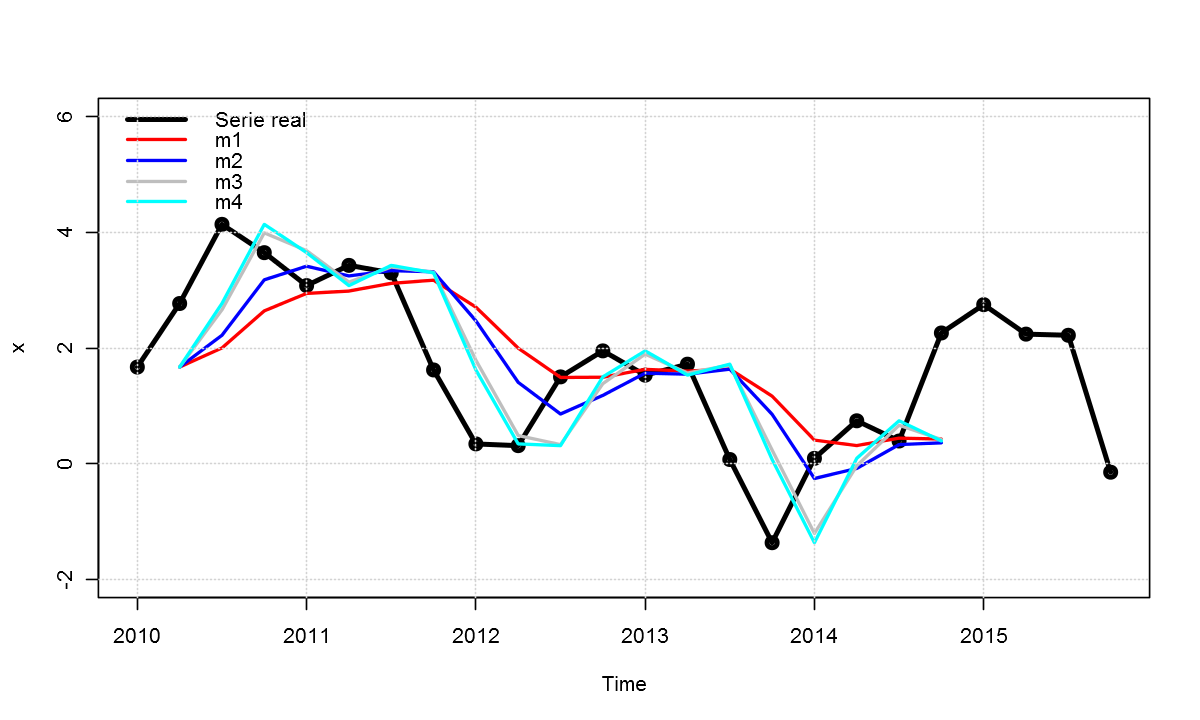

In [11]:
## Gráfica de ajuste.
options(repr.plot.width=10, repr.plot.height=6)

plot(x,              # datos de la serie
     type = "o",     # o -- overplot
     lwd = 3,        # ancho de la linea
     ylim = c(-2,6)) # límites min y max del eje Y


lines(m1$fitted[,1], col = "red", lwd = 2)
lines(m2$fitted[,1], col = "blue",lwd = 2)
lines(m3$fitted[,1], col = "gray",lwd = 2)
lines(m4$fitted[,1], col = "cyan",lwd = 2)

legend( "topleft",                                     # posicion
        c("Serie real","m1","m2", "m3", "m4"),         # texto
        lwd = c(3, 2, 2, 2, 2),                        # grosor lineas
        col = c('black','red','blue', 'gray', 'cyan'), # color lineas
        bty = "n")                                     # caja alrededor de la leyenda

grid()

---

**Ejercicio.--** Para la serie anterior, ajuste modelos de suavizado exponencial utilizando los valores de alpha presentados a continuación y grafique la serie ajustada:

* Alpha: 0.15
* Alpha: 0.35
* Alpha: 0.75
* Alpha: 0.95

**Ejercicio.--** Cual de los modelos ajustados presenta un mejor ajuste basados en el SSE?

---

## Pronostico usando suavizado exponencial simple

[Contenido](#Contenido)

> [`predict.lm {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/predict.lm.html)


Para ello, se usa la función `predict`.

In [12]:
## Pronóstico utilizando función predict

y1 <- predict( m1,                         # Modelo ajustado por HW
               n.ahead = 4,                # Periodos a pronosticar
               prediction.interval = TRUE) # Calcular intervalos   

y2 <- predict( m2,                         # Modelo ajustado por HW
               n.ahead = 4,                # Periodos a pronosticar
               prediction.interval = TRUE) # Calcular intervalos   

y3 <- predict( m3,                         # Modelo ajustado por HW
               n.ahead = 4,                # Periodos a pronosticar
               prediction.interval = TRUE) # Calcular intervalos   

y4 <- predict( m4,                         # Modelo ajustado por HW
               n.ahead = 4,                # Periodos a pronosticar
               prediction.interval = TRUE) # Calcular intervalos   
y1
y2
y3
y4

fit,upr,lwr
0.9752936,3.522707,-1.572120
0.9752936,3.634871,-1.684284
0.9752936,3.742493,-1.791905
0.9752936,3.846083,-1.895495


fit,upr,lwr
1.309431,3.696472,-1.077610
1.309431,3.978224,-1.359362
1.309431,4.232948,-1.614085
1.309431,4.467190,-1.848328


fit,upr,lwr
2.07572,4.233415,-0.08197508
2.07572,4.978602,-0.82716186
2.07572,5.568255,-1.41681462
2.07572,6.071827,-1.92038725


fit,upr,lwr
2.259876,4.378686,0.1410670
2.259876,5.256226,-0.7364735
2.259876,5.929600,-1.4098474
2.259876,6.497285,-1.9775323


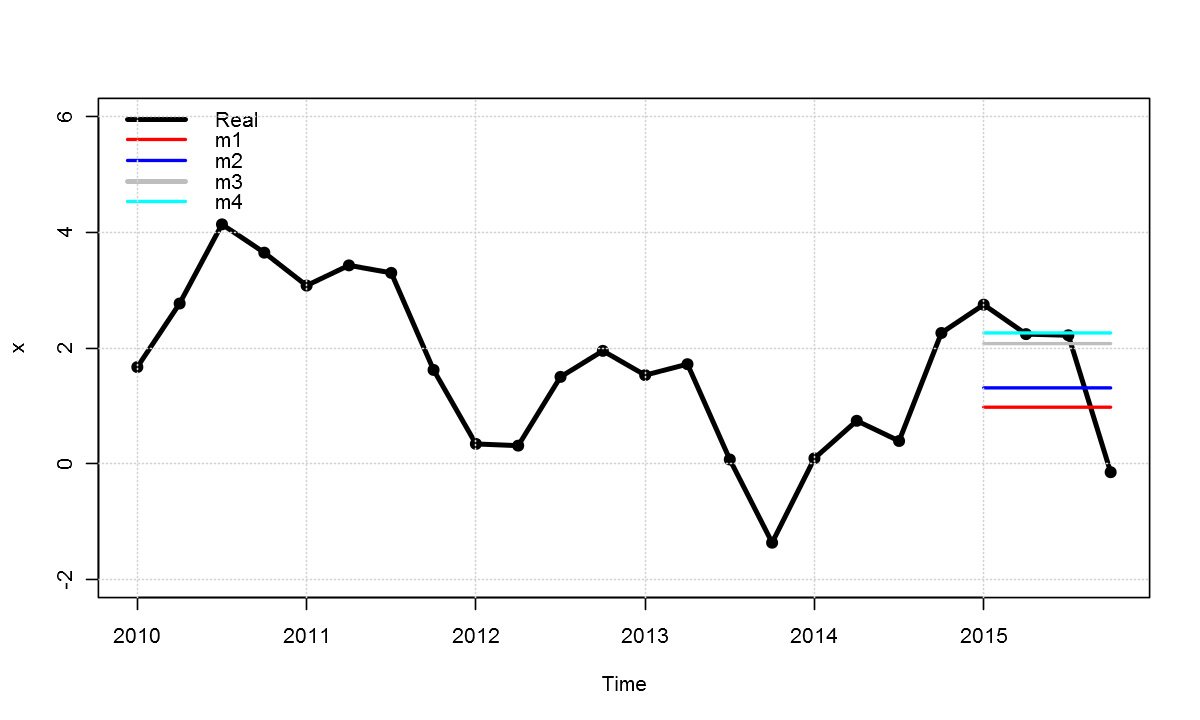

In [13]:
## Gráfico de los pronósticos
options(repr.plot.width=10, repr.plot.height=6)

plot( x, 
      type = "o",
      pch = 20,
      lwd = 3,
      ylim = c(-2,6))


lines( y1[,1], col ="red",  lwd = 2)
lines( y2[,1], col ="blue", lwd = 2)
lines( y3[,1], col ="gray", lwd = 2)
lines( y4[,1], col ="cyan", lwd = 2)

legend( x = "topleft", 
        legend = c("Real", "m1","m2", "m3", "m4"),
        lwd = c(3,2,2),
        col = c('black','red','blue', 'gray', 'cyan'),
        bty = 'n')

grid()

In [14]:
## pronóstico utilizando la función forecast.Holwinters

y1 <- forecast.HoltWinters(m1,   # Modelo ajustado por HW
                           h=4)  # Periodos a pronosticar
y1

        Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
2015 Q1      0.9752936 -0.6903704 2.640958 -1.572120 3.522707
2015 Q2      0.9752936 -0.7637107 2.714298 -1.684284 3.634871
2015 Q3      0.9752936 -0.8340806 2.784668 -1.791905 3.742493
2015 Q4      0.9752936 -0.9018144 2.852402 -1.895495 3.846083

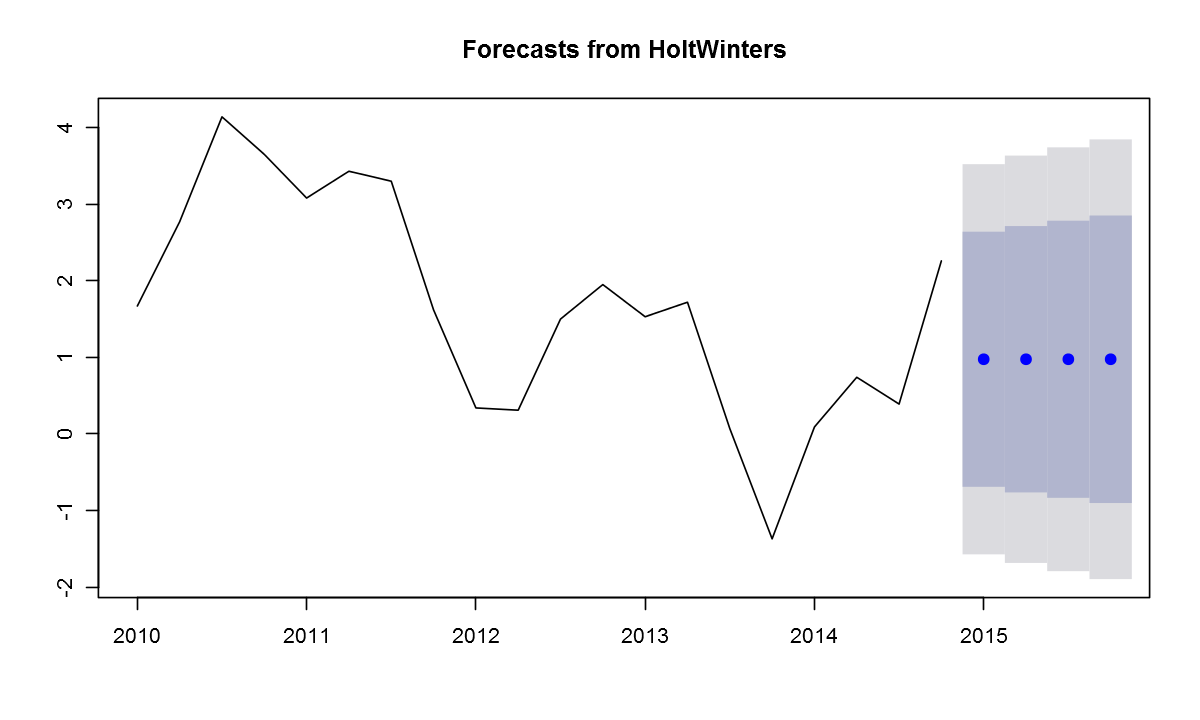

In [15]:
## Automaticamente se presentan los intervalos
options(repr.plot.width=10, repr.plot.height=6)
plot.forecast(y1)

---

**Ejercicio.--** Realice el pronóstico para los 8 periodos siguiente con los 3 mejores modelos y realice la gráfica.

---

# Suavizado exponencial doble-Método de Brown


[Contenido](#Contenido)


La tecnica y los argumentos utilizados en el suavizado exponencial doble son similares al del suavizado simple. Si se tiene: 

$$S_{t+T} = a_t + b_t(T)$$

Representa el pronóstico actualizado, entonces:

*  $a_t = 2S_{t+1} - S_{t+1}^{(2)} $ : Es el intercepto actualizado


*  $b_t = \frac {\alpha}{1-\alpha} (S_{t+1} - S_{t+1}^{(2)})$: Es la pendiente actualizada


* $T$: Número de periodos adelante.


$S_{t+1}$ y $S_{t+1}^{(2)}$ son los estadisticos dobles e individuales suavizados encontrados al aplicar la ecuación de suavizamiento.

$S_{t+1}= y_t + (1-\alpha)S_{t}$


$S_{t+1}^{(2)} = \alpha S_{t+1} + (1-\alpha)S_{t}^{(2)}$

Una vez que los estadisticos individuales y dobles suavizados se calculan para un periodo de tiempo, los valores pueden ser sustituidos dentro de la actualización de las formulas para el intecepto y la pendiente para encontrar un pronóstico.

Para empezar el proceso del suavizado exponencial doble, los valores iniciales de las estimaciones suavizadas pueden ser obtenidas. Esto se puede lograr mediante la sustitución de los valores para el intercepto y pendiente estimada $a$ y $b$ a partir del análisis de regresión lineal en las siguientes ecuaciones

* $S_0 = a - [\frac {1-\alpha}{\alpha}] \times b$

* $S_{0}^{(2)} = a - 2[\frac {1-\alpha}{\alpha}] \times b $

In [16]:
## datos
x <-ts(data = c(13.98, 16.81, 16.60, 17.86,
                17.10, 19.80, 19.79, 22.94,
                20.72, 24.02, 23.56, 25.43,
                23.43, 24.70, 27.56, 28.63,
                29.86, 27.42, 28.59, 30.41, 
                33.41, 28.80, 34.96, 34.69),
       freq = 4,
       start = c(2010, 1))

x.fit <- window(x, start = c(2010, 1), end = c(2014, 4))
x.for <- window(x, start = c(2015, 1), end = c(2015, 4))
x.fit
x.for

      Qtr1  Qtr2  Qtr3  Qtr4
2010 13.98 16.81 16.60 17.86
2011 17.10 19.80 19.79 22.94
2012 20.72 24.02 23.56 25.43
2013 23.43 24.70 27.56 28.63
2014 29.86 27.42 28.59 30.41

      Qtr1  Qtr2  Qtr3  Qtr4
2015 33.41 28.80 34.96 34.69


## Ajuste suavizado exponencial doble

[Contenido](#Contenido)

In [17]:
m1 <- HoltWinters(x.fit,
                  alpha = 0.5, 
                  beta = 0.5, 
                  gamma = FALSE)

m2 <- HoltWinters(x.fit,
                  alpha = 1.0, 
                  beta = 0.1, 
                  gamma = FALSE)


m3 <- HoltWinters(x.fit,
                  alpha = NULL, 
                  beta = NULL, 
                  gamma = FALSE)
m1

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = x.fit, alpha = 0.5, beta = 0.5, gamma = FALSE)

Smoothing parameters:
 alpha: 0.5
 beta : 0.5
 gamma: FALSE

Coefficients:
        [,1]
a 29.8983180
b  0.5097228

In [18]:
m2

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = x.fit, alpha = 1, beta = 0.1, gamma = FALSE)

Smoothing parameters:
 alpha: 1
 beta : 0.1
 gamma: FALSE

Coefficients:
       [,1]
a 30.410000
b  1.077762

In [19]:
m3

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = x.fit, alpha = NULL, beta = NULL, gamma = FALSE)

Smoothing parameters:
 alpha: 0.5991116
 beta : 0.3640799
 gamma: FALSE

Coefficients:
        [,1]
a 29.9329872
b  0.6014567

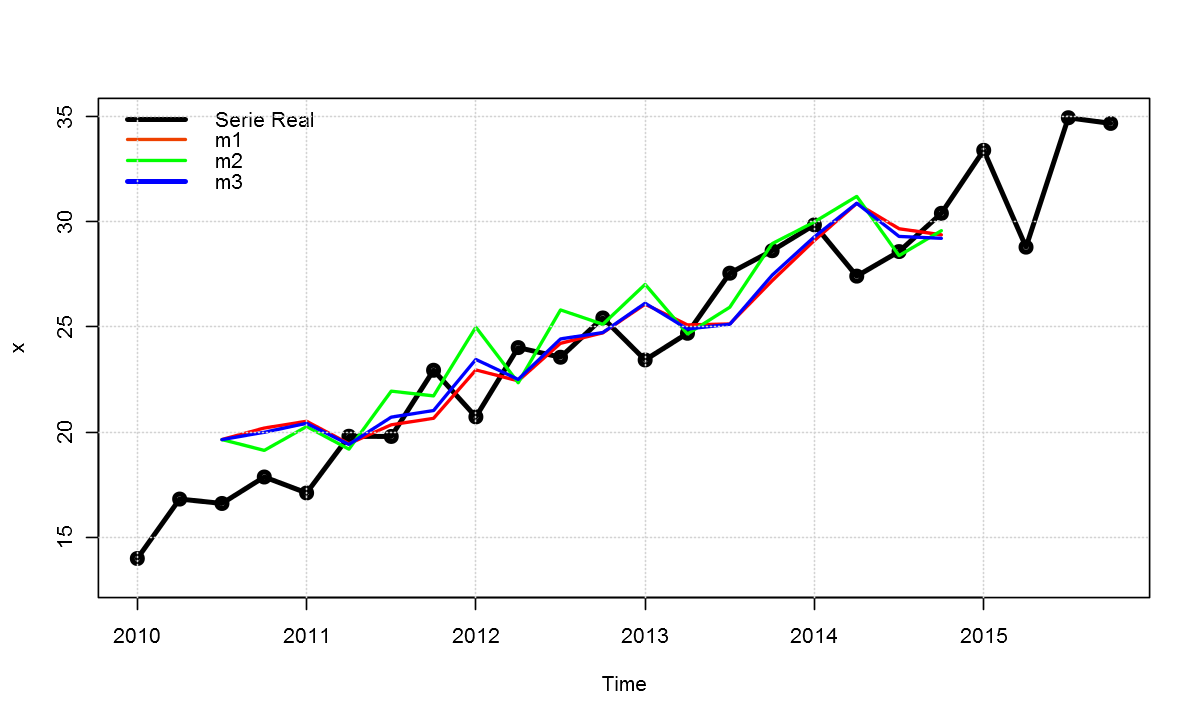

In [20]:
## Gráfica de ajuste.

options(repr.plot.width=10, repr.plot.height=6)

plot(x,
     type = 'o',
     lwd = 3,
     ylim = c(13,35))

lines(m1$fitted[,1], col ="red",   lwd=2)
lines(m2$fitted[,1], col ="green", lwd=2)
lines(m3$fitted[,1], col ="blue",  lwd=2)

legend("topleft", 
       c("Serie Real","m1","m2","m3"),
       lwd = c(3,2,2),
       col = c('black','orangered2','green','blue'),
       bty = "n")

grid()

Sumatoria de errores al cuadrado: SSE = $\sum_{t=1}^{T} {e_{t}^2}$ 

In [21]:
## SSE para cada modelo
m1$SSE
m2$SSE
m3$SSE

[1] 70.25125

[1] 84.37382

[1] 69.34115

---

**Ejercicio.--** Para la serie anterior, ajuste modelos de suavizado exponencial doble utilizando los parámetros presentados a continuación y grafique la serie ajustada:

* alpha = 0.15, beta = 0.2
* alpha: Automatico, beta = 0.5
* alpha: 0.75, beta = 0.8


**Ejercicio.--** Que modelo de los ajustados presenta un menor SSE?

---

## Pronóstico suavizado exponencial doble

[Contenido](#Contenido)

> [`predict.lm {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/predict.lm.html)

In [22]:
y1 <- predict(m1, n.ahead=4, prediction.interval=TRUE)     
y2 <- predict(m2, n.ahead=4, prediction.interval=TRUE)     
y3 <- predict(m3, n.ahead=4, prediction.interval=TRUE)  

y1
y2
y3

fit,upr,lwr
30.40804,34.25423,26.56185
30.91776,35.72550,26.11003
31.42749,37.58439,25.27058
31.93721,39.74886,24.12556


fit,upr,lwr
31.48776,35.38794,27.58759
32.56552,38.36355,26.76750
33.64329,41.09456,26.19201
34.72105,43.73374,25.70835


fit,upr,lwr
30.53444,34.32370,26.74519
31.13590,36.02959,26.24222
31.73736,38.00952,25.46519
32.33881,40.20650,24.47113


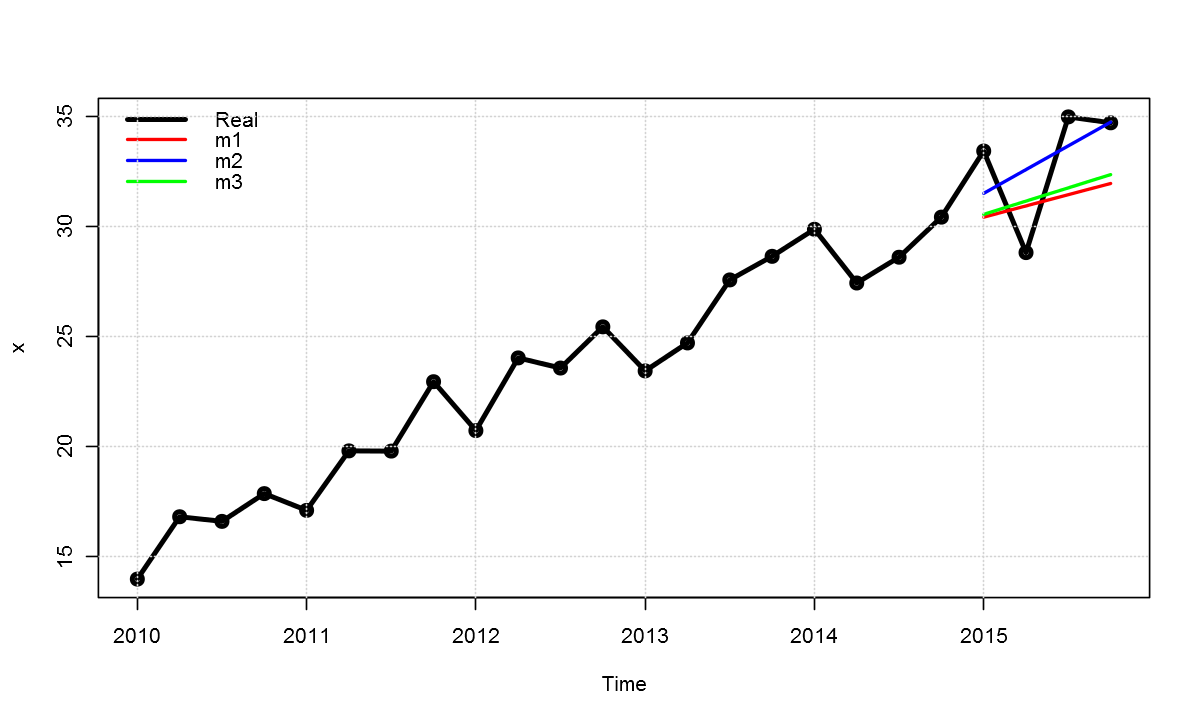

In [23]:
## Gráfica de los pronósticos

options(repr.plot.width=10, repr.plot.height=6)

plot(x, type = "o", lwd = 3)

lines(y1[,1], col="red",   lwd = 2)
lines(y2[,1], col="blue",  lwd = 2)
lines(y3[,1], col="green", lwd = 2)

legend( "topleft", 
        c("Real","m1","m2","m3"),
        lwd = c(3, 2, 2, 2),
        col = c('black', 'red', 'blue', 'green'),
        bty = "n")

grid()

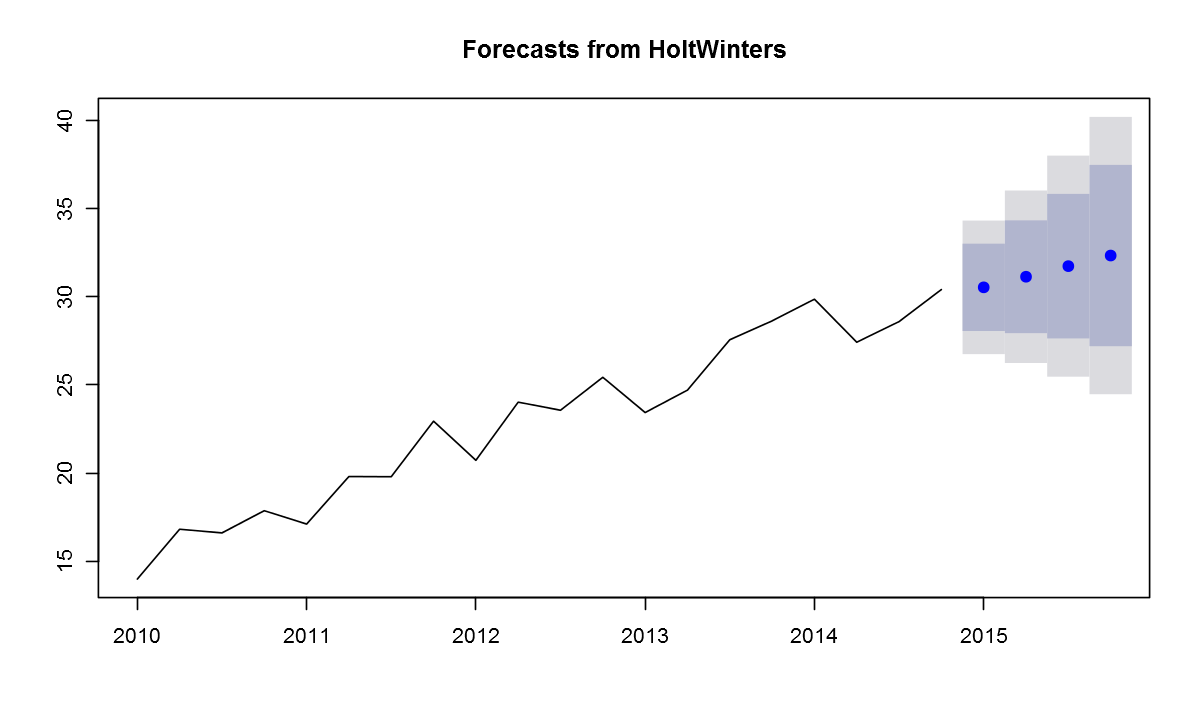

In [24]:
## pronóstico utilizando función forecast.Holwinters

y <- forecast.HoltWinters(m3, h=4)
plot.forecast(y)

---

**Ejercicio.--** Realice el pronóstico para los 10 periodos siguientes con los 2 mejores modelos y realice la gráfica.

---

# Suavizado exponencial triple

[Contenido](#Contenido)

$S_{t+1}= \alpha Y_t + (1-\alpha)S_{t}$


$S_{t+1}^{(2)} = \alpha S_{t+1} + (1-\alpha)S_{t}^{(2)}$


$S_{t+1}^{(3)} = \alpha S_{t+1}^{(2)} + (1-\alpha)S_{t}^{(3)}$

Si se tiene:

$\hat Y_{t+1} = a_t + b_{1,t}(T)+ \frac {1}{2} b_{2,t}({T^2}) $

Entonces:

* $a_t = 3S_{t+1} - 3S_{t+1}^{(2)} + S_{t+1}^{(3)} $
 
 Es la actualización del intercepto, y luego:
 
* $b_{1,t}= \frac {\alpha}{2 \times {(1-\alpha)^2}} [(6-5\alpha)S_{t+1} - 2(5-4\alpha)S_{t+1}^{(2)} + (4-3\alpha)S_{t+1}^{(3)}]$

*  $b_{2,t}= (\frac {{\alpha^2}}{({1-\alpha})^2}) (S_{t+1} - 2 S_{t+1}^{(2)} + S_{t+1}^{(3)}) $

Son la actualización de las pendientes para el pronóstico de un periodo, es decir $T=1$. Para esta metodología los valores iniciales de las estimaciones suavizadas pueden ser obtenidas:

* $S_0 = a - \frac {(1-\alpha)}{\alpha} \times (b_1) + \frac {(1-\alpha)(2-\alpha)}{2 {\alpha^2}} \times (2 b_2)$


* $S_0^{(2)} = a - \frac {2(1-\alpha)}{\alpha} \times (b_1) + \frac {2(1-\alpha)(3-2\alpha)}{2 {\alpha^2}} \times (2 b_2)$


* $S_0^{(3)} = a - \frac {3(1-\alpha)}{\alpha} \times (b_1) + \frac {3(1-\alpha)(4-3\alpha)}{2 {\alpha^2}} \times (2 b_2)$


Donde $a$, $b_1$ y $b_2$ son la estimación de los parametros obtenidos por una regresión lineal multiple. 

In [25]:
## Serie con Tendencia y Ciclo

x <-ts(data = c( 12.82, 13.03, 11.58, 11.77, 
                 12.84, 13.07, 12.36, 12.14,
                 12.96, 13.63, 12.83, 12.16,
                 13.98, 13.88, 13.14, 13.27,
                 13.90, 14.24, 13.46, 13.25,
                 14.54, 14.45, 14.08, 13.83),
       freq = 4,
       start = c(2010,01))


x.fit <- window(x, start = c(2010, 1), end = c(2014, 4))
x.for <- window(x, start = c(2015, 1), end = c(2015, 4))
x.fit
x.for

      Qtr1  Qtr2  Qtr3  Qtr4
2010 12.82 13.03 11.58 11.77
2011 12.84 13.07 12.36 12.14
2012 12.96 13.63 12.83 12.16
2013 13.98 13.88 13.14 13.27
2014 13.90 14.24 13.46 13.25

      Qtr1  Qtr2  Qtr3  Qtr4
2015 14.54 14.45 14.08 13.83

## Suavizado exponencial triple serie de tiempo de componentes aditiva



[Contenido](#Contenido)

Una serie de tiempo de componentes aditivas es expresada como:
$$ y_t = T_t + S_t + E_t $$

In [26]:
## Ajuste del modelo para 20 periodos.

m1 <- HoltWinters( x.fit,
                   alpha = 0.5, 
                   beta = 0.5, 
                   gamma = 0.5,
                   seasonal = "additive")

m2 <- HoltWinters( x.fit,
                   seasonal = "additive")                  

In [27]:
m1

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = x.fit, alpha = 0.5, beta = 0.5, gamma = 0.5,     seasonal = "additive")

Smoothing parameters:
 alpha: 0.5
 beta : 0.5
 gamma: 0.5

Coefficients:
          [,1]
a  13.85633988
b   0.06740154
s1  0.36569328
s2  0.58650284
s3 -0.35513770
s4 -0.61603187

In [28]:
m2

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = x.fit, seasonal = "additive")

Smoothing parameters:
 alpha: 0.05586905
 beta : 0.4069221
 gamma: 0.2989604

Coefficients:
         [,1]
a  13.9208812
b   0.1072919
s1  0.4901535
s2  0.6326733
s3 -0.3342198
s4 -0.5289140

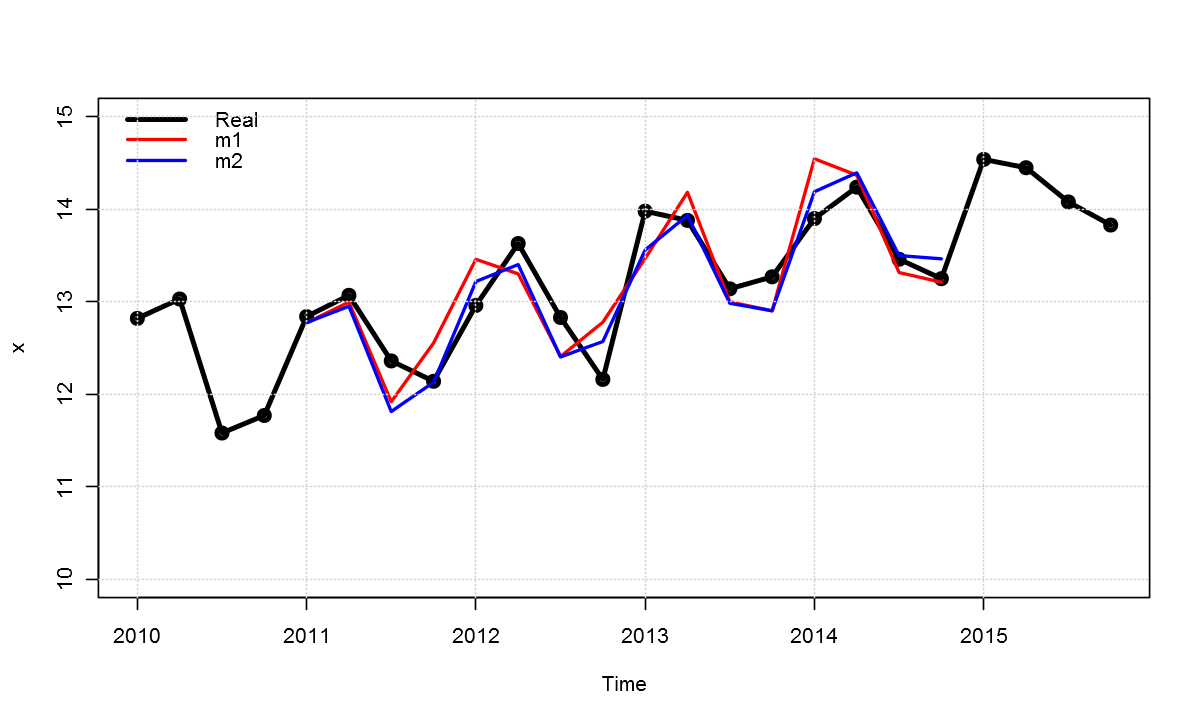

In [29]:
## gráfica de ajuste.

plot(x, type="o", lwd=3, ylim=c(10,15))

lines(m1$fitted[,1], col="red",  lwd=2)
lines(m2$fitted[,1], col="blue", lwd=2)


legend( "topleft", 
        c("Real", "m1", "m2"),
        lwd = c(3,2,2),
        col = c('black','red','blue'),
        bty = "n")

grid()

In [30]:
## SSE para cada modelo
m1$SSE
m2$SSE

[1] 2.260793

[1] 1.282575

---

**Ejercicio.--** Para la serie anterior, ajuste modelos de suavizado exponencial triple utilizando los parámetros presentados a continuación y grafique la serie ajustada.

* alpha, beta y gamma = 0.85 
* alpha = 0.75, beta = 0.8, gamma = 1


**Ejercicio.--** Cuál de los dos modelos anteriores tiene el menor SSE?

---

## Pronóstico suavizado exponencial triple serie de tiempo de componentes aditiva

[Contenido](#Contenido)

In [31]:
y1 <- predict(m1, n.ahead = 4, prediction.interval = TRUE)    
y2 <- predict(m2, n.ahead = 4, prediction.interval = TRUE)     
y1
y2

fit,upr,lwr
14.28943,15.05028,13.52859
14.57765,15.52871,13.62658
13.70341,14.92136,12.48545
13.50991,15.05521,11.96462


fit,upr,lwr
14.51833,15.07950,13.95715
14.76814,15.33104,14.20523
13.90854,14.47431,13.34277
13.82113,14.39117,13.25110


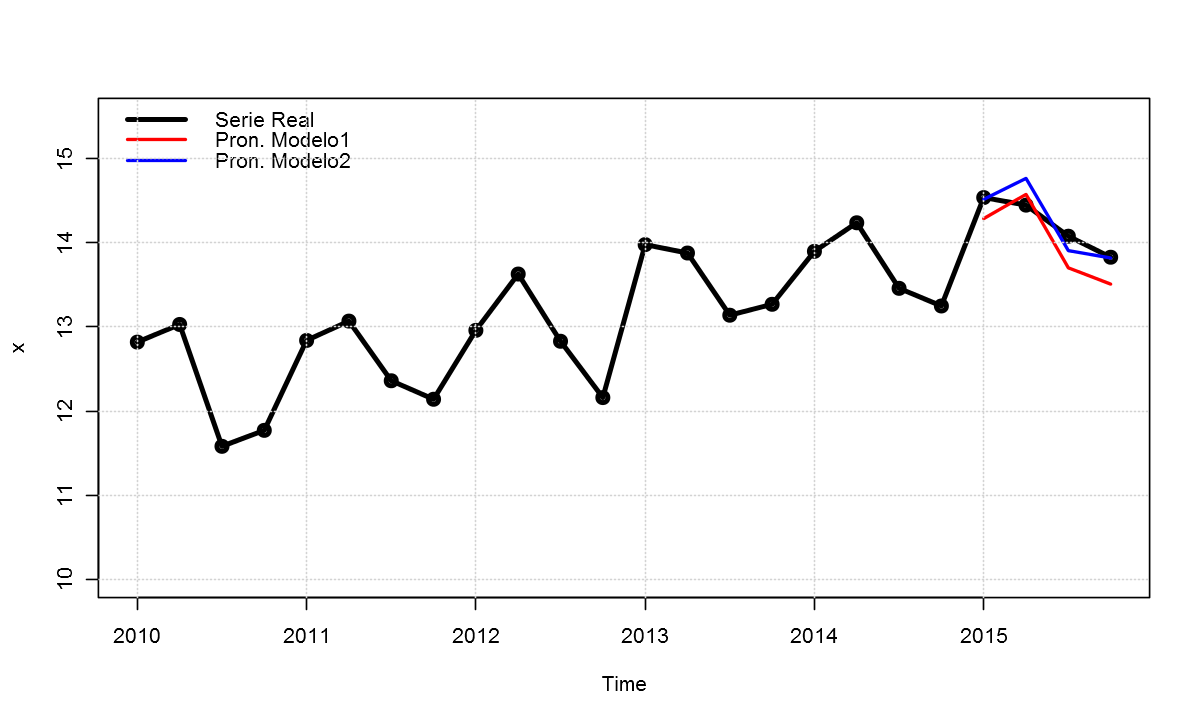

In [32]:
## pronóstico
plot(x, type = "o", lwd = 3, ylim = c(10,15.5))

lines(y1[,1], col = "red",  lwd = 2)
lines(y2[,1], col = "blue", lwd = 2)

legend( "topleft", 
        c("Serie Real","Pron. Modelo1","Pron. Modelo2"),
        lwd = c(3, 2, 2),
        col = c('black', 'red', 'blue'),
        bty = "n")

grid()

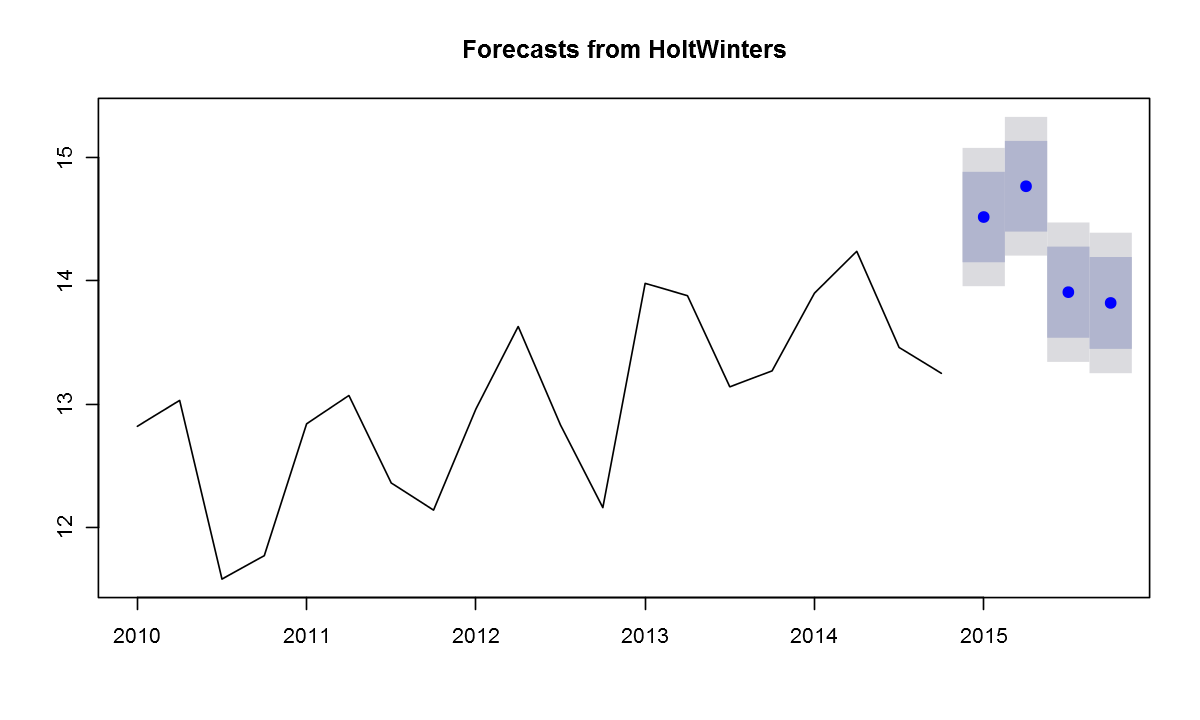

In [33]:
## pronóstico utilizando función forecast.Holwinters
y <- forecast.HoltWinters(m2, h = 4)
plot.forecast( y )

**Ejercicio.--** Realice el pronóstico para los 8 periodos siguiente con el mejor modelo y realice la gráfica.


---


## Suavizado exponencial triple serie de tiempo de componentes multiplicativas

[Contenido](#Contenido)

Una serie de tiempo de componentes multiplicativas, es expresada como:

$$ y_t = T_t * S_t * E_t $$


In [34]:
## datos
x     <- AirPassengers
x.fit <- window(x, start = c(1949, 1), end = c(1959, 12))
x.for <- window(x, start = c(1960, 1), end = c(1960, 12))
x.fit
x.for

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

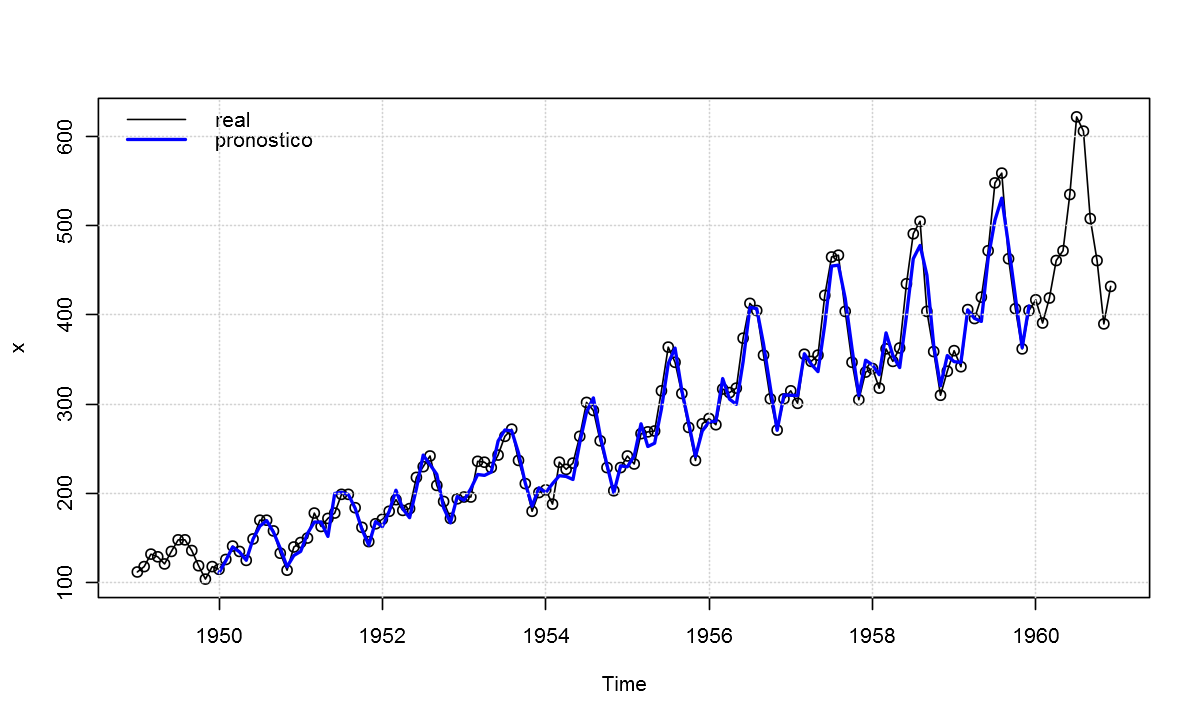

In [35]:
## Ajuste del modelo 
m <- HoltWinters(x.fit, seasonal ="multiplicative")

## gráfica
plot(x,
     type = "o")

lines(m$fitted[,1], col="blue", lwd=2)

legend("topleft",
       c("real","pronostico"),
       lwd=c(1, 2),
       col=c('black', 'blue'),
       bty = "n")

grid()

## Pronóstico suavizado exponencial triple serie de tiempo de componentes multiplicativas


[Contenido](#Contenido)


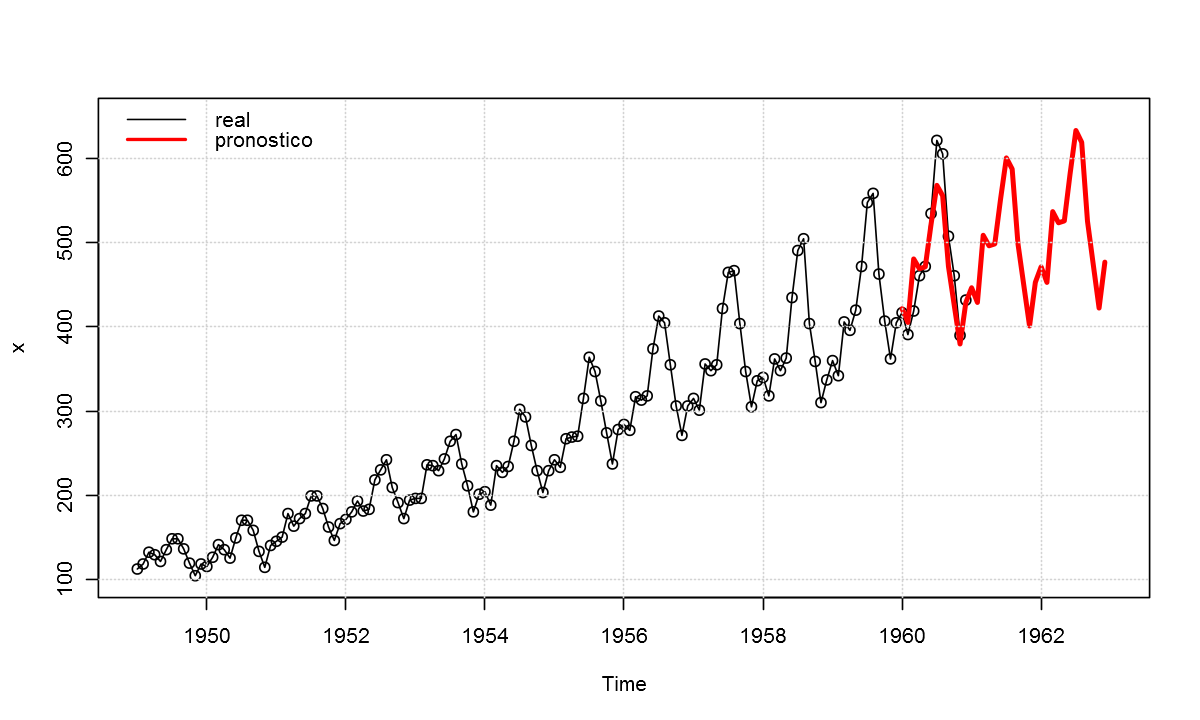

In [36]:
## pronóstico
y.pron <- predict(m, n.ahead=36, prediction.interval=TRUE)


plot(x, type = "o", 
     ylim=c(100,650), 
     xlim=c(1949, 1963), 
     lwd = 1)

lines(y.pron[,1],
      col = "red",
      lwd = 3)

legend("topleft",
       c("real","pronostico"),
       lwd = c(1, 2),
       col = c('black', 'red')
       , bty = "n")

grid()

---

**Ejercicio.--** Pronostique la serie  `data/paper.dat`.

**Ejercicio.--** Pronostique la serie `data/sutter.dat`.

---


[Contenido](#Contenido)
